# Crawler

In [3]:
imo_base_url = "https://www.imo-official.org/"

In [4]:
def connect_to_webpage(url):
    pass

In [5]:
def fetch_scores_and_medals(url):
    pass

# Plotter

In [161]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [200]:
colors = dict()
colors['gold'] = (255 / 255, 223 / 255, 0 / 255)
colors['silver'] = (208 / 255, 210 / 255, 209 / 255)
colors['bronze'] = (128 / 255, 74 / 255, 0 / 255)

colors['gold_marker'] = 'orange'
colors['silver_marker'] = (25 / 255, 81 / 255, 144 / 255)
colors['bronze_marker'] = 'purple'

red_color = (255 / 255, 0 / 255, 0 / 255)
colors['gold_trend'] = tuple(map(np.mean, zip(red_color, red_color, colors['gold'])))
colors['silver_trend'] = tuple(map(np.mean, zip(red_color, red_color, colors['silver'])))
colors['bronze_trend'] = tuple(map(np.mean, zip(red_color, red_color, colors['bronze'])))

In [201]:
# scores_by_year is a list of tuples like (year, [bronze_min, silver_min, gold_min])
def plot_scores_by_year(scores_by_year, colors=colors, trend_poly_degree=2):
    years = []
    bronze_mins = []
    silver_mins = []
    gold_mins = []
    
    minimum_possible = []
    maximum_possible = []
    
    for year, mins_list in scores_by_year:
        years.append(year)
        
        b_min, s_min, g_min = mins_list[0], mins_list[1], mins_list[2]
        bronze_mins.append(b_min)
        silver_mins.append(s_min)
        gold_mins.append(g_min)
        
        maximum_possible.append(42)
        minimum_possible.append(0)
    
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.set_yticks([0, 7, 14, 21, 28, 35, 42])
    ax.set_xticks(years)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
        
    ax.set_title("IMO Cutoffs by Year", size=20)
    
    # Line plots
    ax.plot(years, maximum_possible, color='gold')
    ax.plot(years, gold_mins, marker='s', color=colors['gold'], mfc=colors['gold_marker'])
    ax.plot(years, silver_mins, marker='D', color=colors['silver'], mfc=colors['silver_marker'])
    ax.plot(years, bronze_mins, marker='o', color=colors['bronze'], mfc=colors['bronze_marker'])    
    ax.plot(years, minimum_possible, color='w')    
    
    # Filling the gaps in between
    ax.fill_between(years, gold_mins, maximum_possible, alpha=0.2, color=colors['gold'])
    ax.fill_between(years, silver_mins, gold_mins, alpha=0.2, color=colors['silver'])
    ax.fill_between(years, bronze_mins, silver_mins, alpha=0.2, color=colors['bronze'])
    
    # Trendlines
    gold_poly_fit = np.poly1d(np.polyfit(years, gold_mins, trend_poly_degree))
    silver_poly_fit = np.poly1d(np.polyfit(years, silver_mins, trend_poly_degree))
    bronze_poly_fit = np.poly1d(np.polyfit(years, bronze_mins, trend_poly_degree))
    ax.plot(years, gold_poly_fit(years), linestyle='--', color=colors['gold_trend'])
    ax.plot(years, silver_poly_fit(years), linestyle='--', color=colors['silver_trend'])
    ax.plot(years, bronze_poly_fit(years), linestyle='--', color=colors['bronze_trend'])
    
    
    plt.show()

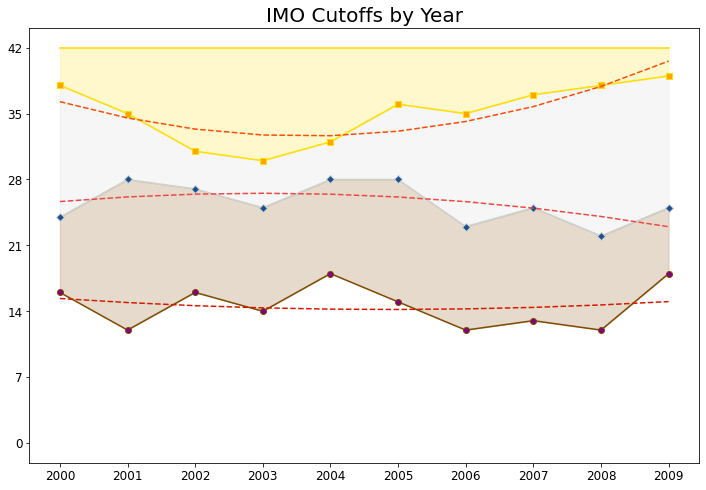

In [204]:
temp_scores_by_year = [(2000 + i, [random.randint(12, 18), random.randint(22, 28), random.randint(30, 40)]) for i in range(10)]
plot_scores_by_year(temp_scores_by_year)